<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Cakra !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Cakra ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Cakra dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Konten <a id='back'></a>

* [Deskripsi Proyek](#intro)

* [Tahap 1.Data load](#data_load)
    * [1.1 Memuat Library](#library_load)
    * [1.2 Informasi dan Deskripsi Data Awal](#data_info)

    
* [Tahap 2. Cek kualitas Data](#data_quality) 
    * [2.1 Mengubah tipe data ](#data_type)
    * [2.2 Menghapus sebagian pengunjung yang berada di kedua kelompok A dan B](#drop_unique)
    * [2.3 Cek Data Duplikat dan Data Null](#cek_duplicate_null')
  
    
* [Tahap 3.Memprioritaskan Hipotesis](#hypotheses_priority) 

* [Tahap 4.Memprioritaskan Hipotesis](#hypotheses_priority) 
    * [4.1 Gambarkan pendapatan kumulatif berdasarkan kelompok](#cumulative_group)    
    * [4.2 Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok](#avg_cumulative_group)
    * [4.3 Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A](#cumulative_diff)
    * [4.4 Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari](#conversion_group)
    * [4.5 Grafik perubahan relatif rata-rata kumulatif pesanan per pengunjung dari kelompok B dibandingkan dengan kelompok A](#avg_conversion_group)
    * [4.6 Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna](#scatt_ordersbyusers)
    * [4.7 Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali](#percentiles_orderbyusers)
    * [4.8 Buat diagram tebar (scatter chart) untuk harga pesanan](#scatt_ordersbyrevenue)

    * [4.9 Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali](#percentiles_revenue)

    * [4.10 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah.](#stats_raw)

    * [4.11 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah](#orders_raw)

    * [4.12 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter](#stats_filtered)

    * [4.13 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter](#orders_filtered)





* [Kesimpulan Umum](#conlusion)

# Deskripsi proyek

## Konteks

Kamu adalah seorang data analyst di sebuah toko online besar. Kamu bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. 
Nah, tugasmu adalah memprioritaskan hipotesis tersebut, menjalankan A/B testing, dan menganalisis hasilnya. 

## Deskripsi Data

Data yang digunakan pada bagian pertama proyek
`/datasets/hypotheses_us.csv` 

- Hypotheses — deskripsi singkat tentang hipotesis

- Reach — jangkauan pengguna, dalam skala satu hingga sepuluh

- Impact — dampak terhadap pengguna, dalam skala satu hingga sepuluh

- Confidence — keyakinan pada hipotesis, dalam skala satu sampai sepuluh

- Effort — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.

Data yang digunakan pada bagian kedua proyek
 `
 /datasets/orders_us.csv`


- transactionId — ID pesanan

- visitorId — ID pengguna yang membuat pesanan

- date — tanggal dibuatnya pesanan

- revenue — pendapatan dari pesanan

- group — kelompok uji (test group) A/B tempat pengguna berada

`/datasets/visits_us.csv`


- date — tanggal

- group — kelompok uji (test group) A/B

- visitors — jumlah pengunjung pada tanggal yang ditentukan dalam kelompok uji A/B yang ditentukan

- visits — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

Pastikan untuk melakukan pra-pemrosesan data terlebih dahulu, ya. Tidak menutup kemungkinan, dataset asli yang kamu miliki mengandung kesalahan; misalnya, sebagian pengunjung mungkin berada di kelompok A maupun di kelompok B.



<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 1. Data Load <a id='data_load'></a>

## 1.1 Memuat library <a id='library_load'></a>

**Berikut tahapan pada data load:**

- Memuat library yang diperlukan

- Memuat data hipotesis, mengubah penamaan menjadi kecil dan, memisahkan dengan separator agar data dapat dibaca

- Memuat data orders dan visits

- Cek info dan sampel pada masing masing data

In [1]:
import pandas as pd, numpy as np, datetime as dt
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats as st

Pada langkah awal, dilakukan pemanggilan library yang diperlukan untuk proses analisis data. Selanjutnya, memuat data hipotesis,orders, dan visits.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 1.2 Memuat Data dan Informasi data awal <a id='data_info'></a>

In [2]:
path = r'C:/Users/cakra2/OneDrive/Desktop/TripleTen-Project-Sprint/PROJECT 8/DATASET/'

path_hypothesis = path+'hypotheses_us.csv'
hypo = pd.read_csv(path_hypothesis, sep=';')
hypo.columns = hypo.columns.str.lower()
hypo.info()
hypo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Pada saat memuat data hipotesis(`hypo`) ditambahkan separator `;` agar data terpisah dan kolom diubah lowercase agar konsisten. Lalu tampilkan info data beserta data hipotesis. Data ini akan giudnakan untuk memprioritaskan hipotesis dengan framework RICE dan ICE lalu dibandingkan hasil hipotesis dari kedua framework tersebut

In [3]:
path_orders = path+'orders_us.csv'
orders = pd.read_csv(path_orders)
orders.info()
orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
914,2792059099,1602967004,2019-08-08,65.2,A
385,2812811922,858552794,2019-08-03,25.5,A
1045,1076322816,2219162270,2019-08-11,95.2,A
626,3022667018,3935952912,2019-08-29,30.1,B
953,2932932798,3694317332,2019-08-28,140.2,B


Memuat data `orders` dan menampilkan info maupun sample data. Data orders berisi setiap pesanan oleh pengguna yang akan digunakan untuk Analisis A/B testing


In [4]:
path_visits = path+'visits_us.csv'
visits = pd.read_csv(path_visits)
visits.info()
visits.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
49,2019-08-19,B,487
39,2019-08-09,B,610
60,2019-08-30,B,490
4,2019-08-05,A,756
8,2019-08-09,A,617


Memuat data `visits` dan menampilkan info maupun sampel data. Data visits berisi jumlah data tiap kelompok. Data ini juga akan digunakan pada Analisis A/B testing bersama data orders.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2. Cek kualitas Data  <a id='data_quality'></a>

Berikut tahapan pada data quality check :

- Mengubah tipe data pada kolom `date` di data `orders` dan `visits` menjadi datetime 

- Terdapat 58 pengunjung yang berada di 2 kelompok

- Menghapus 58 pengunjung yang berada di kelompok A maupun di kelompok B 

- Cek data terduplikat dan cek data null pada semua dataset


## 2.1 Mengubah tipe data <a id='data_type'></a>

In [5]:
orders['date'] = orders['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x : dt.datetime.strptime(x, '%Y-%m-%d'))

Tipe data kolom date di data `orders` dan `visits` masih object, oleh karena itu perlu diubah menjadi datetime 

## 2.2 Menghapus sebagian pengunjung yang berada di kedua kelompok A dan B <a id='drop_unique'></a>

In [6]:
# Find unique user IDs for each group
UserIdA = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()
UserIdB = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

# Find common user IDs in both groups
common_users = UserIdB[UserIdB.isin(UserIdA)]

# Print the number of common users and their IDs
print('Number of common users:', len(common_users))
print('User IDs appearing in both groups:')
print(common_users)

Number of common users: 58
User IDs appearing in both groups:
20       963407295
23       351125977
24      3234906277
27       237748145
32      2038680547
60      4256040402
61      2712142231
71         8300375
85       276558944
94       457167155
111     3062433592
139     2716752286
189     1648269707
246      199603092
252     3803269165
254     2686716486
267     2579882178
310     3984495233
327     1668030113
330     1738359350
359     3717692402
380     2458001652
391     2378935119
402     1294878855
406     1404934699
415     2587333274
432     3202540741
455     2954449915
479     2927087541
480     2600415354
496     3951559397
516     2044997962
535     3972127743
561     3957174400
606     3891541246
674     1230306981
682     4266935830
685     1614305549
688     1333886533
732      477780734
778     1602967004
783     1959144690
805     1801183820
814     4186807279
832     3766097110
857     2780786433
900     1316129916
936      393266494
973     3941795274
1009   

In [7]:
orders = orders[~orders['visitorId'].isin(common_users)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [8]:
UserIdAFiltered = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()
UserIdBFiltered = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

stackedIdFiltered = UserIdBFiltered[UserIdBFiltered.isin(UserIdAFiltered)]

print('User ID that now exist in both group:', len(stackedIdFiltered))


User ID that now exist in both group: 0


Di deskripsi dijelaskan bahwa:

*Tidak menutup kemungkinan, dataset asli yang kamu miliki mengandung kesalahan; misalnya, sebagian pengunjung mungkin berada di kelompok A maupun di kelompok B.*

Pada tahap pengecekan pengunjung diatas terdapat 58 pengunjung yang berada di kedua kelompok tersebut. Ini dapat mengganggu analisis A/B testing, oleh karena itu perlu dihapus. 


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 2.3 Cek Data Duplikat dan Data Null <a id='cek_duplicate_null'></a>

In [9]:
def check_null_values(*dfs):
    results = {}
    for df in dfs:
        total_values = df.size
        total_null = df.isnull().sum()
        percent_null = (total_null / total_values) * 100
        missing_data = pd.concat([total_null.rename('Total'), percent_null.rename('Percent')], axis=1)
        df_name = df.name
        results[df_name] = missing_data
    return results

# Assuming hypo, visits, and orders are your DataFrames
# Set name attribute for each DataFrame
hypo.name = 'Hypotheses'
visits.name = 'Visits'
orders.name = 'Orders'

# Memeriksa nilai-nilai nol dalam DataFrames
null_data = check_null_values(hypo, visits, orders)

# Menampilkan hasil
for df_name, missing_data in null_data.items():
    print(f"\nMissing values in {df_name}:\n{missing_data}")


Missing values in Hypotheses:
            Total  Percent
hypothesis      0      0.0
reach           0      0.0
impact          0      0.0
confidence      0      0.0
effort          0      0.0

Missing values in Visits:
        Total  Percent
date        0      0.0
group       0      0.0
visits      0      0.0

Missing values in Orders:
               Total  Percent
transactionId      0      0.0
visitorId          0      0.0
date               0      0.0
revenue            0      0.0
group              0      0.0


Terakhir mengecek apakah data data diatas tidak memiliki duplikat maupun nilai null pada setiap data yang akan digunakan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3. Memprioritaskan Hipotesis  <a id='hypotheses_priority'></a>




File hypotheses_us.csv memuat sembilan hipotesis untuk meningkatkan pendapatan toko online dengan Reach, Impact, Confidence, dan Effort yang sudah ditentukan untuk masing-masing hipotesis.
Tugasmu adalah:


- Menerapkan framework ICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

- Menerapkan framework RICE untuk memprioritaskan hipotesis. Urutkan hipotesis tersebut dalam urutan prioritas menurun.

- Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE. Berikan penjelasan terkait perubahan tersebut.


In [10]:
hypo['ICE'] = round(hypo['impact'] * hypo['confidence'] / hypo['effort'], 1)
hypo['RICE'] = round(hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['effort'], 1)
hypo

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.3,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.0,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.0,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.1,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.0,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.3,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.0,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.2,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.2,16.2


In [11]:
ICE_sort = hypo[['hypothesis','ICE']].sort_values(by= 'ICE', ascending= False)
ICE_sort

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.2
0,Add two new channels for attracting traffic. T...,13.3
7,Add a subscription form to all the main pages....,11.2
6,Show banners with current offers and sales on ...,8.0
2,Add product recommendation blocks to the store...,7.0
1,Launch your own delivery service. This will sh...,2.0
5,Add a customer review page. This will increase...,1.3
3,Change the category structure. This will incre...,1.1
4,Change the background color on the main page. ...,1.0


In [12]:
RICE_sort = hypo[['hypothesis','RICE']].sort_values(by= 'RICE', ascending= False)
RICE_sort


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


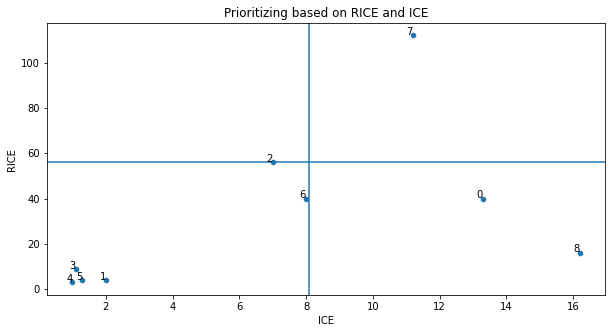

In [13]:
# Menunjukkan perubahan prioritas hipotesis saat RICE diterapkan untuk menggantikan ICE.
plt.figure(figsize=(10, 5))
sns.scatterplot(data=hypo, x='ICE', y='RICE')
plt.title('Prioritizing based on RICE and ICE')

#add horizontal line
plt.axhline(y=56)

#add vertical line
plt.axvline(x=8.1)
for line in range(0, hypo.shape[0]):
     plt.text(hypo.ICE[line], hypo.RICE[line]+0.2, hypo.index[line], horizontalalignment='right', size='medium', color='black')
plt.show()

Dapat dilihat bahwa perubahan prioritas terjadi ketika menggunakan metode RICE dibandingkan dengan metode ICE. Hal ini disebabkan oleh penambahan faktor "Reach" pada metode RICE, yang menggambarkan seberapa banyak pengguna yang akan terpengaruh oleh perubahan tersebut. Berikut adalah penilaian prioritas utama berdasarkan hipotesis RICE dan ICE :

- Hipotesis pada project no 7  ("Add a subscription form to all the main pages") menjadi prioritas utama karena memiliki nilai Reach yang tinggi (10), meskipun memiliki nilai ICE yang lebih rendah. 

- Hipotesis pada project no 0("Add two new channels for attracting traffic") dan 8 ("Launch a promotion that gives users discounts") memiliki nilai ICE yang tinggi namun rendah RICE yang berarti kurangnya reach daripada impact maupun confidence

- Sisanya hanya memiliki low RICE dan ICE yang berarti masih kurang 4 faktor yaitu reach, impact, confidence dan effort sehingga diprioritaskan terendah.



<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 4. Analisis A/B Testing <a id='abtesting'></a>

## 4.1 Gambarkan pendapatan kumulatif berdasarkan kelompok. <a id='cumulative_group'></a>

Untuk mencari kumulatif berdasarkan kelompok yaitu dengan menggagregasi kedua data `orders` dan `visits`, tetapi sebelumnya kita pisahkan data tanggal beserta group dengan `drop.duplicates()`. Setelah itu baru menggabungkan kedua data tersebut sebagai data kumulatif

In [14]:
datesGroups = (
    orders[['date','group']]
    .drop_duplicates()
) 

datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [15]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date': 'max', 
          'group': 'max', 
          'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated 


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [17]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [18]:
cumu_revenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumu_revenueA.head()

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99


In [19]:
cumu_revenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumu_revenueB.head() 

,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89


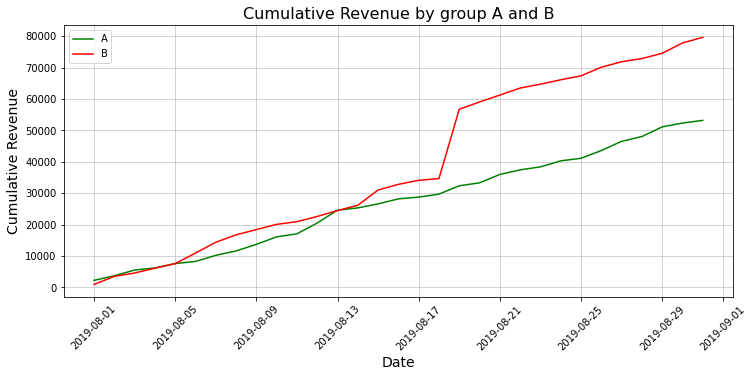

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(cumu_revenueA['date'], cumu_revenueA['revenue'], label='A', color = 'green')
plt.plot(cumu_revenueB['date'], cumu_revenueB['revenue'], label='B', color = 'red')
plt.title('Cumulative Revenue by group A and B', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Revenue', fontsize=14)
plt.grid(True, alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

- Sepanjang pengetesan menunjukkan Kumulatif Pendapatan pada grup A dan B terus meningkat sepanjang pengujian.

- Kelompok A (hijau) mengalami peningkatan pendapatan yang stabil, mencapai puncaknya pada sekitar tanggal 6 Agustus, dan kemudian terus meningkat secara perlahan hingga akhir periode.

- Kelompok B (merah) memiliki fluktuasi awal yang signifikan, tetapi sejak awal pengujian mengalami peningkatan pendapatan yang cepat. 

- Tetapi pada kelompok B(merah) terdapat lonjakan pendapatan pada 19/08/2019. Ini mungkin menunjukkan adanya kenaikan pesanan atau pesanan dengan harga yang mahal.Anomali ini akan diketahui pada tahap berikutnya

- Secara keseluruhan, kedua kelompok menunjukkan tren peningkatan pendapatan seiring berjalannya waktu, dengan puncak pendapatan yang hampir bersamaan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

 ## 4.2 Gambarkan ukuran pesanan rata-rata kumulatif berdasarkan kelompok. <a id='avg_cumulative_group'></a>

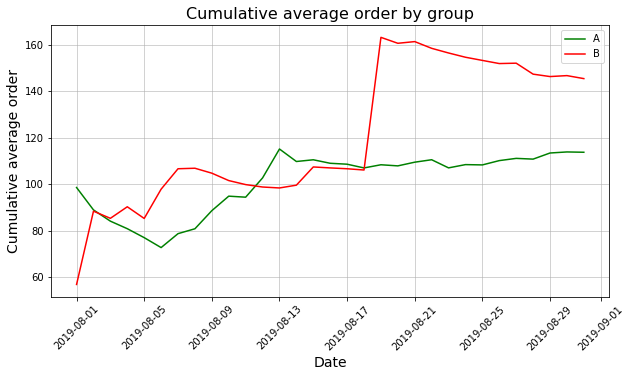

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(cumu_revenueA['date'], cumu_revenueA['revenue']/cumu_revenueA['orders'], label='A',color = 'green')
plt.plot(cumu_revenueB['date'], cumu_revenueB['revenue']/cumu_revenueB['orders'], label='B',color = 'red')
plt.title('Cumulative average order by group',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel("Cumulative average order", fontsize=14)
plt.grid(True, alpha=0.7)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend();

Ukuran pesanan rata-rata kumulatif terlihat stabil seperti grafik sebelumnya. Lonjakan pada kelompok B pada 19/8/2019 mungkin disebabkan oleh pesanan besar dan mahal, memerlukan lebih banyak data untuk menetapkan tingkatnya. Meskipun harga pembelian rata-rata di Kelompok B lebih tinggi, trennya menurun, dan tidak jelas apakah akan turun di bawah Kelompok A. Data tambahan diperlukan untuk menetapkan tingkatnya.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.3 Gambarkan perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A. <a id='cumulative_diff'></a>


In [22]:
merged_cumulative_revenue = cumu_revenueA.merge(cumu_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.columns = ['date', 'revenue_a', 'orders_a', 'revenue_b', 'orders_b']

merged_cumulative_revenue.head()


,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


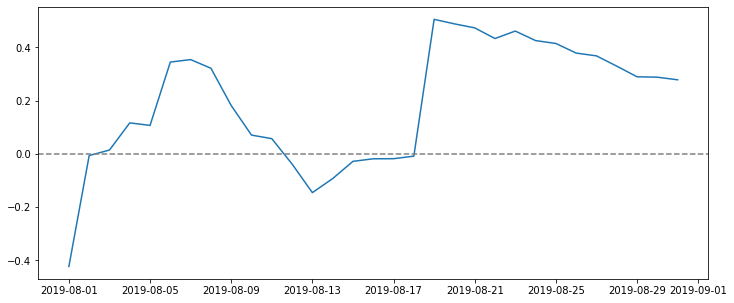

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

plt.axhline(y=0, color='grey', linestyle='--')


Pada grafik ini mengungkap lonjakan signifikan dalam perbedaan antara kelompok pada beberapa titik pada grafik. Ini menunjukkan adanya nilai-nilai yang berada di luar kebiasaan, yang menyebabkan perubahan drastis. Kemungkinan adanya pesanan besar atau nilai yang menyimpang. Perlu dibutuhkan data tambahan untuk membuat kesimpulan yang pasti mengenai perbedaan relatif antara ukuran pesanan rata-rata.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.4 Hitung tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari.  <a id='conversion_group'></a>

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


In [25]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [26]:
cumu_convA = cumulativeData[cumulativeData['group']=='A']
cumu_convA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
2,2019-08-02,A,42,36,3734.9,1338,0.031390
4,2019-08-03,A,66,60,5550.1,1845,0.035772
6,2019-08-04,A,77,71,6225.6,2562,0.030055
8,2019-08-05,A,99,92,7623.6,3318,0.029837


In [27]:
cumu_convB = cumulativeData[cumulativeData['group']=='B']
cumu_convB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,17,17,967.2,713,0.023843
3,2019-08-02,B,40,39,3535.3,1294,0.030912
5,2019-08-03,B,54,53,4606.9,1803,0.029950
7,2019-08-04,B,68,66,6138.5,2573,0.026428
9,2019-08-05,B,89,87,7587.8,3280,0.027134


(18109.0, 18139.0, 0.0, 0.05)

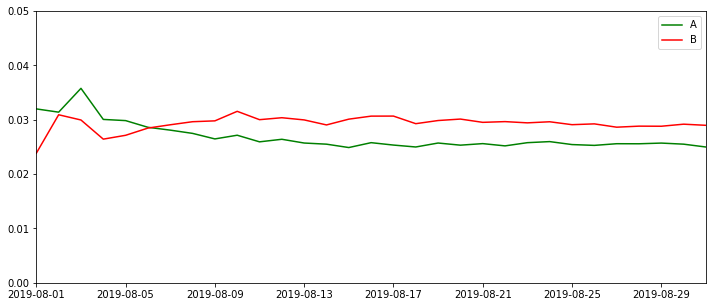

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(cumu_convA['date'], cumu_convA['conversion'], label='A',color = 'green')
plt.plot(cumu_convB['date'], cumu_convB['conversion'], label='B',color = 'red')
plt.legend()

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

- Kelompok A, pada awalnya, memiliki tingkat konversi yang lebih tinggi dibandingkan dengan Kelompok B. Namun, pada beberapa titik, Kelompok B berhasil mengejar dan bahkan melampaui tingkat konversi Kelompok A.

- Pada pertengahan pengujian, terjadi fluktuasi dan penurunan tingkat konversi untuk keduanya. Kelompok A mengalami penurunan yang lebih signifikan sebelum akhirnya mencapai stabilisasi. Di sisi lain, Kelompok B, setelah beberapa fluktuasi, mengalami peningkatan dan mencapai tingkat konversi yang stabil pada akhir pengujian.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.5 Grafik perubahan relatif rata-rata kumulatif pesanan per pengunjung dari kelompok B dibandingkan dengan kelompok A  <a id='avg_conversion_group'></a>


In [29]:
merged_cumulative_conversion = cumu_convA[['date', 'conversion']].merge(cumu_convB[['date','conversion']], left_on = 'date', right_on  = 'date', how = 'left', suffixes = ['A','B'])

merged_cumulative_conversion.head()


,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


(18109.0, 18139.0, -0.5, 0.5)

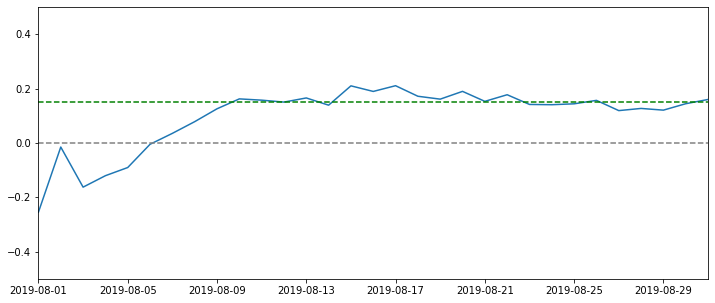

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(merged_cumulative_conversion['date'], (merged_cumulative_conversion['conversionB']/merged_cumulative_conversion['conversionA'])-1)

plt.axhline(y=-0, color='grey', linestyle='--');
plt.axhline(y=0.15, color='green', linestyle='--');
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

Pada kelompok B terdapat penurunan tajam di awal, diikuti oleh lonjakan kuat dan penurunan kembali sebelum stabil pada akhir. Perubahan relatif positif yang signifikan ditandai oleh garis hijau pada nilai 0,15, menunjukkan peningkatan yang substansial di kelompok B dibandingkan dengan kelompok A.S ecara umum, tingkat konversi memang tidak stabil, sehingga perlunya pengecekan pada anomali anomali tertentu.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.6 Buat diagram tebar (scatter chart) untuk jumlah pesanan per pengguna.  <a id='scatt_ordersbyusers'></a>

In [31]:
OrdersByUsers = (
    orders
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId')
    .agg({'transactionId': pd.Series.nunique})
    .reset_index()  
)
OrdersByUsers .columns = ['userId', 'orders']

OrdersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


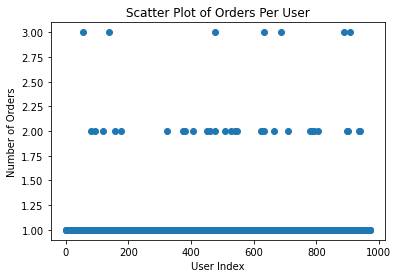

In [32]:
x_values = pd.Series(range(0,len(OrdersByUsers)))
plt.scatter(x_values, OrdersByUsers['orders']) 
plt.title('Scatter Plot of Orders Per User')
plt.xlabel('User Index')
plt.ylabel('Number of Orders')
plt.show()


**Kesimpulan:**

- Mayoritas pengguna hanya melakukan satu pesanan, seperti yang terlihat dari sebaran yang berfokus di sekitar nilai 1 pada sumbu y.

- Terdapat beberapa pengguna yang melakukan lebih dari satu pesanan, membentuk ekor panjang pada nilai sumbu y yang lebih tinggi.

**Asumsi:**

- Pengguna dengan jumlah pesanan lebih dari satu mungkin merupakan pengguna yang lebih terlibat atau memiliki minat khusus dalam produk atau layanan yang diuji.

- Adanya outlier dapat memengaruhi analisis konversi dan perlu dipertimbangkan dalam evaluasi performa kelompok A dan B.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.7 Hitung persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna. Tentukan titik ketika suatu titik data berubah menjadi anomali. <a id='percentiles_orderbyusers'></a>

In [33]:
percentiles = np.percentile(OrdersByUsers['orders'], [95, 99])
print('Tidak lebih dari 5% pengguna melakukan pemesanan sejumlah', percentiles[0],'pesanan')
print('Tidak lebih dari 1% pengguna melakukan pemesanan sejumlah', percentiles[1],'pesanan')


Tidak lebih dari 5% pengguna melakukan pemesanan sejumlah 1.0 pesanan
Tidak lebih dari 1% pengguna melakukan pemesanan sejumlah 2.0 pesanan


- Persentil ke-95 menunjukkan bahwa 95% pengguna melakukan satu pesanan atau kurang. Ini adalah titik di mana data mulai dianggap sebagai nilai atipikal.

- Persentil ke-99 menunjukkan bahwa 99% pengguna melakukan dua pesanan atau kurang. Jika suatu pengguna melakukan lebih dari dua pesanan, data ini dianggap sebagai anomali atau outlier.

Dengan demikian, pengguna yang melakukan lebih dari dua pesanan dapat dianggap sebagai anomali dalam konteks ini

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.8 Buat diagram tebar (scatter chart) untuk harga pesanan. <a id='scatt_ordersbyrevenue'></a>

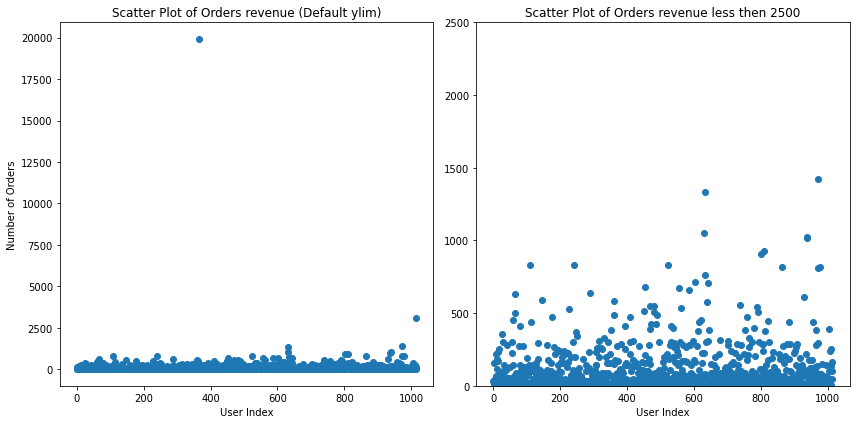

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'])
plt.title('Scatter Plot of Orders revenue (Default ylim)')
plt.xlabel('User Index')
plt.ylabel('Number of Orders')

# Scatter plot with ylim set to 5000
plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'])
plt.title('Scatter Plot of Orders revenue less then 2500')
plt.xlabel('User Index')
plt.ylim(0, 2500) 

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Terdapat sejumlah besar titik yang tersebar di berbagai tingkat harga dan juga terlihat ada pesanan abnormal yang memiliki ukuran besar. Pada scatter plot kedua batasan pada sumbu y (ylim=2500) terlihat banyaknya pesanan. Dari sini kita bisa menentukan batasan pesanan yang normal yaitu sekitar 2500

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.9 Hitung persentil ke-95 dan ke-99 untuk harga pesanan. Tentukan titik ketika suatu titik data berubah menjadi anomali. <a id='percentiles_revenue'></a>

In [35]:
percentiles = np.percentile(orders['revenue'], [95, 99])

print('Tidak lebih dari 5% pengguna melakukan pemesanan di atas', percentiles[0],'dollar')
print('Tidak lebih dari 1% pengguna melakukan pemesanan di atas', percentiles[1],'dollar')



Tidak lebih dari 5% pengguna melakukan pemesanan di atas 414.275 dollar
Tidak lebih dari 1% pengguna melakukan pemesanan di atas 830.3 dollar


- Persentil ke-95 menunjukkan bahwa tidak lebih dari 5% pengguna melakukan pemesanan di atas 414.275
- Sedangkan persentil ke-99 menunjukkan bahwa tidak lebih dari 1% pengguna melakukan pemesanan di atas 830.3. 

Dengan demikian, pesanan di atas nilai-nilai ini dapat dianggap sebagai anomali atau outlier dalam konteks ini.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.10 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah.  <a id='stats_raw'></a>

In [36]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False). agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersA

,visitorId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [37]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False). agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
ordersByUsersB

,visitorId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [38]:
SampleA = (
    pd.concat([ordersByUsersA['orders'],
               pd.Series(0, 
                         index=np.arange(
                             visits[visits['group']=='A']['visits'].sum() 
                             - len(ordersByUsersA['orders'])
                         ), 
                         name='orders')],
              axis=0
             )
)

In [39]:
SampleB = (
    pd.concat([ordersByUsersB['orders'],
               pd.Series(0, 
                         index=np.arange(
                             visits[visits['group']=='B']['visits'].sum() 
                             - len(ordersByUsersB['orders'])
                         ), 
                         name='orders')],
              axis=0
             )
)

**Hipotesis:**

Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam konversi antara kedua kelompok.

Hipotesis Alternatif (H1): Terdapat perbedaan signifikan dalam konversi antara kedua kelompok.

Pengujian Statistik: Mann-Whitney testing

Alpha (tingkat signifikansi): 0.05 (5%)

In [40]:
alpha = 0.05  

conv_raw = st.mannwhitneyu(SampleA, SampleB)

print('p-value: ', conv_raw.pvalue.round(3))

if (conv_raw.pvalue < alpha):
    print('Hipotesis nol ditolak: perbedaannya secara statistik signifikan')
else:
    print('Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya.')

relative_difference = SampleB.mean() / SampleA.mean() - 1
print('Perbedaan Konversi Relatif : {0:.1%}'.format(relative_difference))


p-value:  0.011
Hipotesis nol ditolak: perbedaannya secara statistik signifikan
Perbedaan Konversi Relatif : 16.0%


- Berdasarkan hasil uji Mann-Whitney U pada data mentah, diperoleh nilai p-value sebesar 0.011, yang lebih kecil dari tingkat signifikansi (alpha) sebesar 0.05. Dengan demikian, kita menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan konversi yang signifikan antara kelompok A dan B secara statistik.

- Secara lebih rinci, perbedaan konversi relatif antara kelompok B dan A adalah sekitar 16.0%, menunjukkan bahwa kelompok B memiliki tingkat konversi yang lebih tinggi dibandingkan dengan kelompok A.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.11 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah. <a id='orders_raw'></a>

**Hipotesis:**

Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam perbedaan ukuran pesanan rata-rata kelompok.

Hipotesis Alternatif (H1): Terdapat perbedaan signifikan dalam perbedaan ukuran pesanan rata-rata kelompok.

Pengujian Statistik: Mann-Whitney testing

Alpha (tingkat signifikansi): 0.05 (5%)

In [41]:
alpha = 0.05
orders_raw= st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value: ',orders_raw.pvalue.round(3))

if (orders_raw.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya.")
    
print('Perbedaan Relatif Ukuran Pesanan Rata-rata antara Kelompok A dan B: ','{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.862
Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya.
Perbedaan Relatif Ukuran Pesanan Rata-rata antara Kelompok A dan B:  27.8%


Berdasarkan pengujian Mann-Whitney, p-value sebesar 0.862, yang lebih tinggi dari tingkat signifikansi 0.05. Oleh karena itu, kita tidak dapat menolak hipotesis nol. Ini berarti tidak ada cukup bukti untuk menyatakan adanya perbedaan signifikan dalam ukuran pesanan rata-rata antara Kelompok A dan B berdasarkan data mentah. Meskipun nilai rata-rata ukuran pesanan Kelompok B lebih tinggi (27.8%) dibandingkan dengan Kelompok A.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.12 Temukan signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter <a id='stats_filtered'></a>

In [42]:
usersHighestOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']], axis = 0)


print('Pengguna dengan pesanan lebih dari 95% :',len(usersHighestOrders), 'users')

Pengguna dengan pesanan lebih dari 95% : 36 users


In [43]:
usersExpensiveOrders = orders[orders['revenue'] >  414.275]['visitorId']

print('Pengguna dengan ukuran pesanan lebih dari 95%:',len(usersExpensiveOrders),'users')

Pengguna dengan ukuran pesanan lebih dari 95%: 51 users


In [44]:
abnormalUsers = pd.concat([usersHighestOrders, usersExpensiveOrders ], axis = 0).drop_duplicates().sort_values()

print('abnormal users:',len(abnormalUsers),'users')

abnormal users: 86 users


In [45]:
SampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)
SampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18697, dtype: int64

In [46]:
SampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)
SampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18869, dtype: int64

In [47]:
orders_filt = st.mannwhitneyu(SampleAFiltered, SampleBFiltered)
print('p-value: ', orders_filt.pvalue.round(3))

if (orders_filt.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya")
    
print('Perbedaan Relatif konversi antara Kelompok A dan B pada data filter ','{0:.3f}'.format(SampleBFiltered.mean() / SampleAFiltered.mean() - 1))

p-value:  0.016
Hipotesis nol ditolak: perbedaannya secara statistik signifikan
Perbedaan Relatif konversi antara Kelompok A dan B pada data filter  0.174


- Jumlah pengguna dengan pesanan atau ukuran pesanan yang signifikan (di atas 95% dari data) adalah sebanyak 86 pengguna.

- Berdasarkan pengujian Mann-Whitney pada data yang telah difilter, p-value sebesar 0.016, lebih rendah dari tingkat signifikansi 0.05. Oleh karena itu, kita menolak hipotesis nol. Hal ini menunjukkan adanya perbedaan konversi yang signifikan antara Kelompok A dan B pada data yang telah difilter.

- Perbedaan relatif konversi pada data yang telah difilter adalah sekitar 17.4%, menunjukkan bahwa Kelompok B memiliki peningkatan konversi yang signifikan dibandingkan dengan Kelompok A

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## 4.13 Temukan signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter. <a id='orders_filtered'></a>

In [48]:
filtered_orderA = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

filtered_orderA

7        20.1
8       215.9
10       65.7
12      115.4
14      170.9
        ...  
1185     15.2
1187     15.5
1188      5.7
1193     50.1
1194    165.3
Name: revenue, Length: 406, dtype: float64

In [49]:
filtered_orderB = orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

filtered_orderB

0        30.4
1        15.2
3       155.1
4        40.5
5        35.0
        ...  
1181    390.5
1186    240.6
1190    135.3
1191    255.7
1192    100.8
Name: revenue, Length: 481, dtype: float64

In [50]:
revenue_filt = st.mannwhitneyu(filtered_orderA, filtered_orderB)
print('p-value: ', revenue_filt.pvalue.round(3))

if (revenue_filt.pvalue < alpha):
    print("Hipotesis nol ditolak: perbedaannya secara statistik signifikan")
else:
    print("Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya")
    
print('Perbedaan ukuran pesanan rata-rata antara Kelompok A dan B pada data filter: ','{0:.3f}'.format(filtered_orderB.mean() / filtered_orderA.mean() - 1))


p-value:  0.771
Gagal menolak hipotesis nol: kita tidak dapat menyimpulkan perbedaannya
Perbedaan ukuran pesanan rata-rata antara Kelompok A dan B pada data filter:  -0.033


- Berdasarkan pengujian Mann-Whitney pada data yang telah difilter, p-value sebesar 0.771, yang lebih tinggi dari tingkat signifikansi 0.05. 

- Oleh karena itu, kita gagal menolak hipotesis nol. Hal ini menunjukkan bahwa tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara Kelompok A dan B pada data yang telah difilter.

- Tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara Kelompok A dan B. Asumsinya adalah bahwa, setelah menyaring data, pengaruh outlier atau anomali pada ukuran pesanan telah diminimalkan, sehingga tidak ada perbedaan yang signifikan yang dapat diamati antara kedua kelompok.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# Kesimpulan Umum

- Metode RICE memberikan perubahan prioritas dibandingkan dengan metode ICE, karena memperhitungkan faktor "Reach". Prioritas tertinggi adalah untuk Hipotesis 7 ("Menambahkan formulir langganan ke semua halaman utama") karena memiliki nilai Reach yang tinggi (10) meskipun nilai ICE lebih rendah.

- Hipotesis 0 ("Menambahkan dua saluran baru untuk menarik lalu lintas") dan Hipotesis 8 ("Meluncurkan promosi yang memberikan diskon kepada pengguna") memiliki nilai ICE tinggi, tetapi nilai RICE rendah, menunjukkan kurangnya jangkauan dibandingkan dengan dampak dan keyakinan.

- Peningkatan Konversi pada Kelompok B: Terdapat peningkatan signifikan dalam tingkat konversi pada Kelompok B, baik pada data mentah maupun data yang telah difilter. Ini menunjukkan potensi positif dalam implementasi perubahan atau faktor yang mempengaruhi konversi di Kelompok B.

- Pendapatan Kumulatif Meningkat: Meskipun ada fluktuasi, kedua kelompok menunjukkan tren peningkatan pendapatan kumulatif sepanjang pengujian. Kelompok B bahkan mencapai tingkat konversi yang lebih tinggi pada beberapa titik.

- Ukuran Pesanan Rata-rata yang Stabil: Meskipun tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara kelompok, grafik menunjukkan bahwa ukuran pesanan rata-rata cenderung stabil. Ini memberikan indikasi bahwa perubahan tidak mempengaruhi ukuran pesanan secara negatif.

- Kelompok B berhasil mengejar dan bahkan melampaui tingkat konversi Kelompok A, meskipun terjadi fluktuasi dan penurunan tingkat konversi pada pertengahan pengujian untuk kedua kelompok.

- Uji Mann-Whitney menunjukkan perbedaan konversi yang signifikan antara Kelompok A dan B, namun tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara keduanya berdasarkan data mentah. Setelah filtering data, terdapat perbedaan konversi yang signifikan, tetapi tidak ada perbedaan signifikan dalam ukuran pesanan rata-rata antara kedua kelompok.

- Sejumlah besar pengguna (86 pengguna) memiliki pesanan atau ukuran pesanan yang signifikan (di atas 95% dari data) dan perlu diperhatikan.

Disarankan untuk melanjutkan uji selama satu bulan lagi untuk mendapatkan lebih banyak data dan memahami tren jangka panjang, sambil melakukan investigasi lebih lanjut terhadap lonjakan pendapatan dan konversi pada Kelompok B.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>